In [1]:
import sys
sys.path.append('/home/samantha/Documents/REU/scripts/') # Use the absolute path to the directory
from prospectFunctionsSFH import *

from matplotlib.pyplot import *
import emcee
import corner

In [2]:
params, obs, sps, wspec = init_prospect_generation()

In [3]:
theta = [params['tage'], params['logtau'], params['fburst'], params['fage_burst'], params['const'], params['ftrunc']]
theta

[1.0, -1.0, 0.0, 0.0, 0.0, 0.0]

In [4]:
B, Berr = 6.9, 1.5
data = (B,Berr,params,obs,sps)

nwalkers = 132
niter = 50000
initial = np.array([0.3, 0.0, 0.8, .6, .1, .2]) # tage, logtau, fburst, fage_burst, const, ftrunc

ndim = len(initial)
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

###########################################################################################################################################

sampler_test = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=data)
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=data)

print("Running burn-in...")
p0, _, _ = sampler_test.run_mcmc(p0, 100, progress=True)

# sampler.reset()

print("Running production...")
pos, prob, state = sampler.run_mcmc(p0, niter, progress=True)

print('done')


Running burn-in...


100%|██████████████████████████████████████████████████████████████████████| 100/100 [01:09<00:00,  1.44it/s]


Running production...


100%|████████████████████████████████████████████████████████████████| 50000/50000 [5:28:05<00:00,  2.54it/s]

done


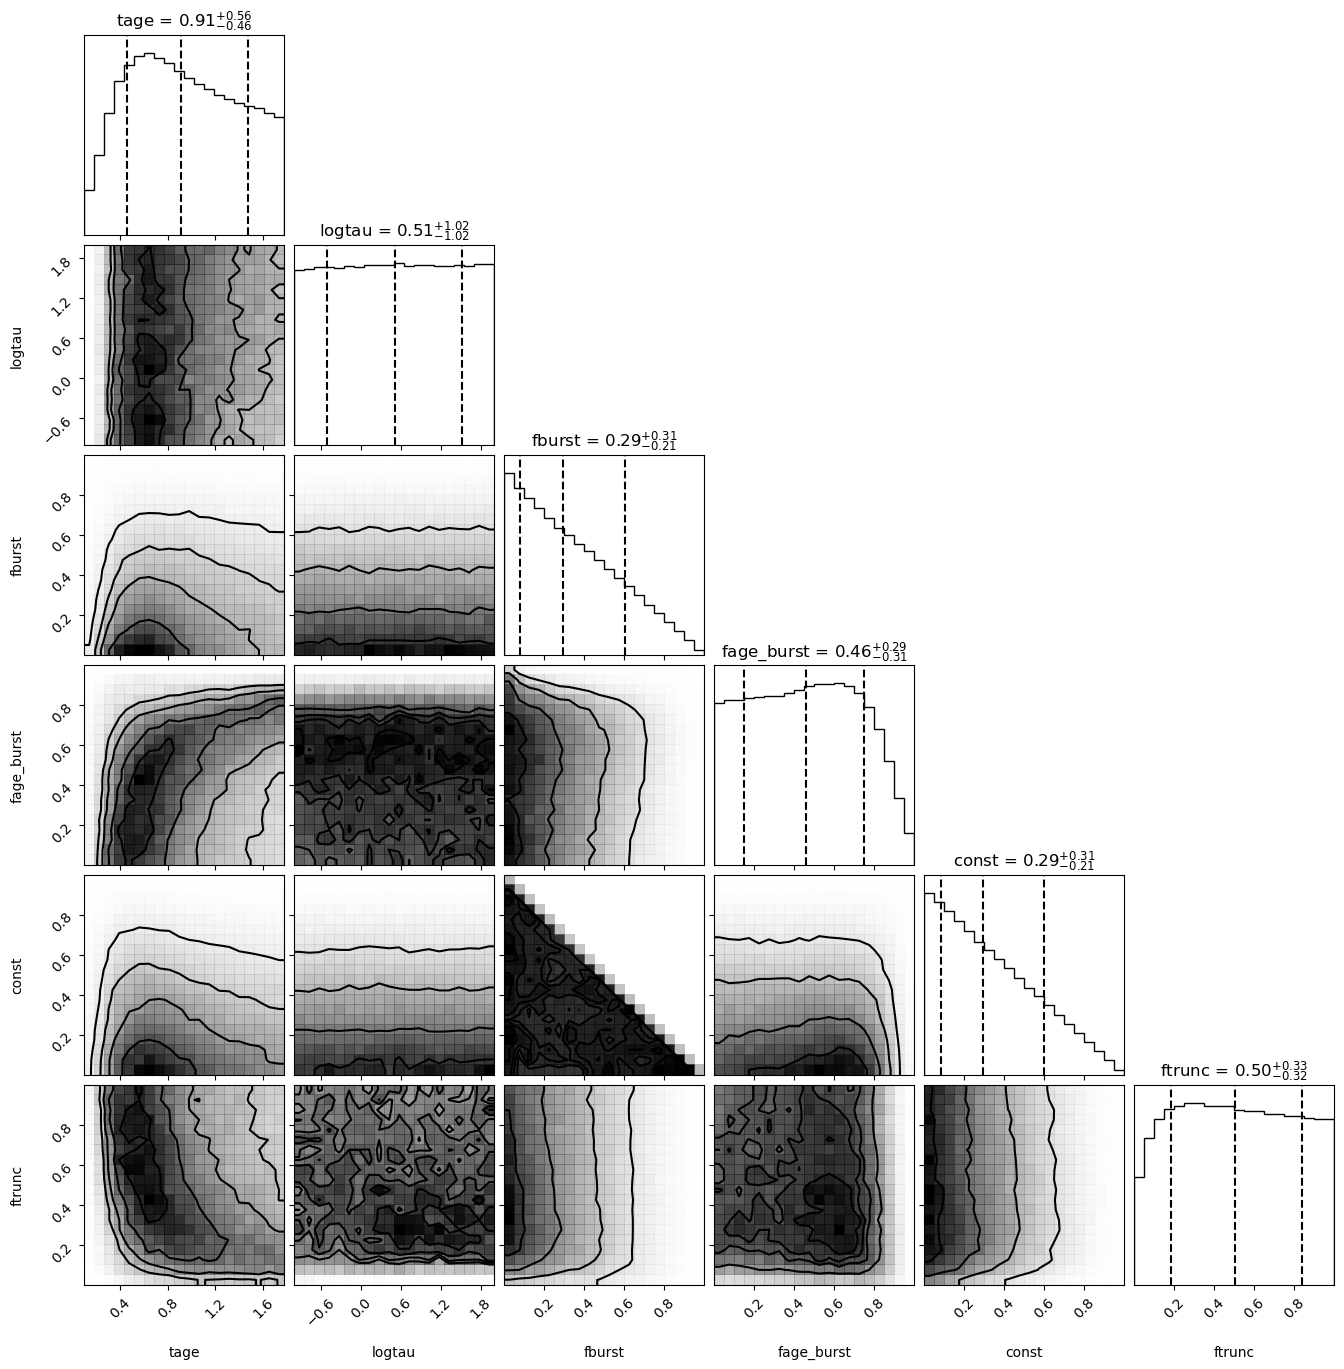

In [5]:
samples=sampler.flatchain

labels = ['tage', 'logtau', 'fburst', 'fage_burst', 'const', 'ftrunc']
fig = corner.corner(samples,show_titles=True,labels=labels,plot_datapoints=False,quantiles=[0.16, 0.5, 0.84])

savefig('emcee_sfh_50000.png')

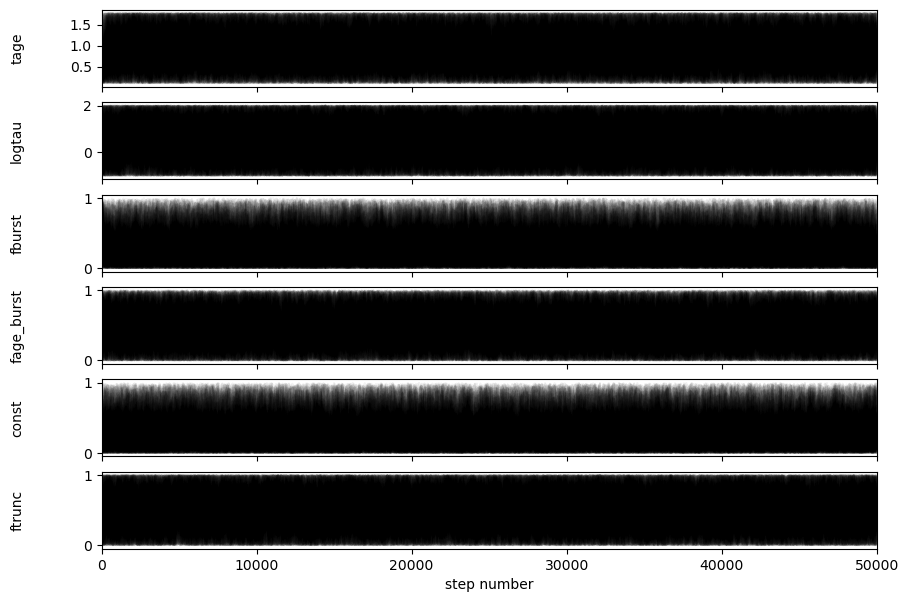

In [6]:
fig, axes = subplots(6, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
# labels = ["m", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.05)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

savefig('samples_chain_50000.png')